<a href="https://colab.research.google.com/github/JobinJose9660/sales-predictions/blob/main/Copy_of_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
sales = '/content/sales_predictions(3).csv'
df = pd.read_csv(sales)
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#Hrows and columns?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
#Datatypes of each variable?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
#Checking for any duplicated rows or columns
df.duplicated().any()

False

In [8]:
#Checking for missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
#Filling the missing value column'Item_Weight with mean
df['Item_Weight'] = df['Item_Weight'].fillna( df['Item_Weight'].mean() )

In [10]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
# Since grocery stores are missing most of the values,and they have small size ,I'm replacing missing values with small 
df['Outlet_Size'].fillna(value= 'Small',inplace = True)

In [12]:
#verifying if data contains any missing data
df.isnull().sum()    # confirmed that no missng values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [14]:
#checking for spelling errors
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
df.loc[df['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'

In [16]:
df.loc[df['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'

In [17]:
df.loc[df['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'

In [20]:
df.loc[df['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'

In [21]:
df.loc[df['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'

In [22]:
df.loc[df['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'

In [23]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [24]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [25]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [26]:
#checking unit inconstitencies
df['Item_MRP']

0       249.8092
1        48.2692
2       141.6180
3       182.0950
4        53.8614
          ...   
8518    214.5218
8519    108.1570
8520     85.1224
8521    103.1332
8522     75.4670
Name: Item_MRP, Length: 8523, dtype: float64

In [27]:
#summary stastics for numerical columns
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [28]:
df.to_csv('/content/sales_predictions.csv')

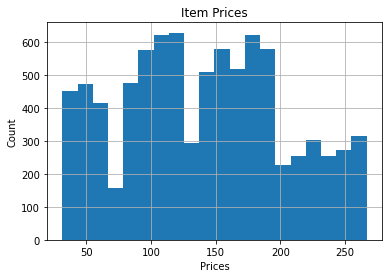

In [29]:
#Analysis of  the data
#1 Histogram to analyize various distubution
#Distribution of Price of Items(Item_MRP)
import matplotlib.pyplot as plt
import seaborn as sns
df['Item_MRP'].hist(bins = 20)
plt.xlabel('Prices')
plt.ylabel('Count')
plt.title('Item Prices')
plt.show()


In [ ]:
#we can see that most of the items prices are in betwee 100 and 200 , also items with prices around  75 are low 

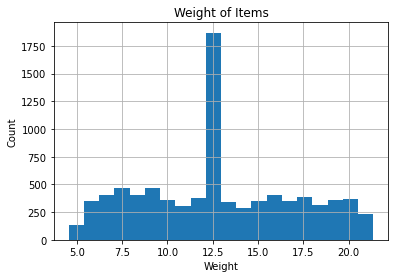

In [30]:
#Distrbution of Item_Weight
df['Item_Weight'].hist(bins = 20)
sns.set()
plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Weight of Items')
plt.show()

we can see that most of the items having weight of 12.5 ,also items having 5 pounds are less 

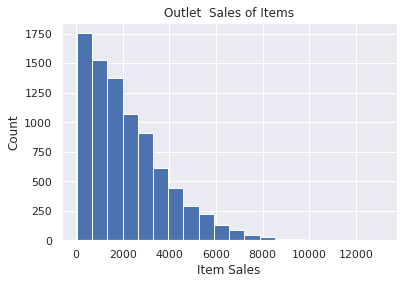

In [31]:
#Distrbution of Item Sales
df['Item_Outlet_Sales'].hist(bins = 20)
plt.xlabel('Item Sales')
plt.ylabel('Count')
plt.title('Outlet  Sales of Items')
plt.show()

We can see that most of the items sales are around 500,and there is no Item whose sale is more than 8000 

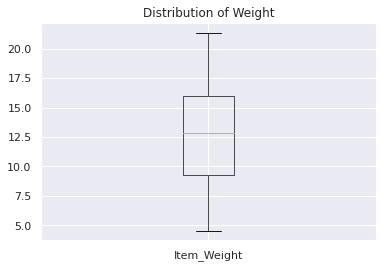

In [32]:
#Stastical summary of Item_Weight
df.boxplot(column = 'Item_Weight')
plt.title('Distribution of Weight')
plt.show()

In [ ]:
##We can see that average Weigtht of the Items are 12.5 , maximum Weight of the Item is 21.35,Minimum Weight is 4.55
#also there is no outliers 
#when we do deep analysis
#First Quartile (Q1) = 9.31
   ## Third Quartile (Q3) = 16.00
    #Interquartile Range (IQR) = Q3 - Q1 = 6.71
    #1.5 * IQR = 10.05
    #'Minimum' (before outliers) is Q1 - 10.5 = -1.19
    '#Maximum' (before outliers) is Q3 + 10.5 = 26.5

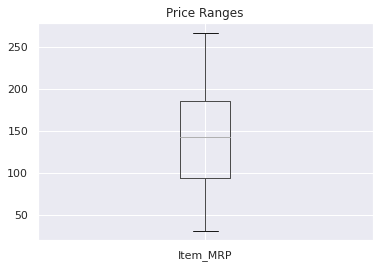

In [33]:
df.boxplot(column = 'Item_MRP')
plt.title('Price Ranges')
plt.show()

In [ ]:
##We can see that average Price of the Items are 143 , maximum Price of the Item is 266.6,Minimum Price is 31.29
#also there is no outliers 
#when we do deep analysis
#First Quartile (Q1) = 93.8
   # Third Quartile (Q3) = 185.6
    #Interquartile Range (IQR) = Q3 - Q1 = 91.8
    #1.5 * IQR = 137.7
    #'Minimum' (before outliers) is Q1 - 137.7 = -43.9
    #'Maximum' (before outliers) is Q3 + 10.5 = 323.3

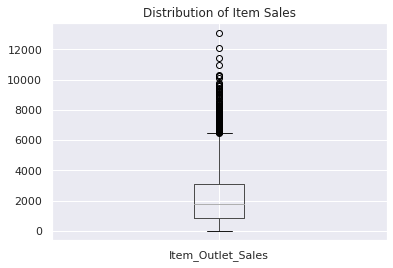

In [34]:
#Stastical summary of Item_Outlet_Sales
df.boxplot(column ='Item_Outlet_Sales')
plt.title('Distribution of Item Sales')
plt.show()

In [ ]:
#We can see that average sales of the Items are 1794.3 , maximum Price of the Item is 13086.6,Minimum Price is 33.2
#also there are outliers above 10000 and two above 12000
#when we do deep analysis
#
    #First Quartile (Q1) = 834.24
    #Third Quartile (Q3) = 3101.2
    #Interquartile Range (IQR) = Q3 - Q1 = 2266.96
    #1.5 * IQR = 3400.44
    #'Minimum' (before outliers) is Q1 - 3400.44 = -2566.44
    #'Maximum' (before outliers) is Q3 + 3400.44 = 6501.2

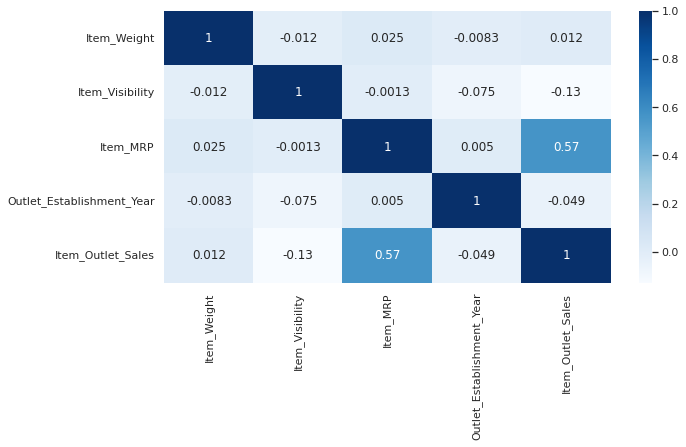

In [35]:
#Analysing corelation features using heat map
corelation = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corelation, cmap = 'Blues',annot=True)


In [ ]:
#By analysing the corelation heat map we can see there is high(Positive) corelation between Item_Outlet_ Sales and Item_MRP
#There is negative corelation (Very Less)between Item_Outlet_Sales and Item_Visbility
#Also we can see there is medium range of corelation between Item_MRP and Item_Weight

Analysis of Price and  sales with Size of Outlet;
 Does Total Sales , price increase when outlet size varies ?

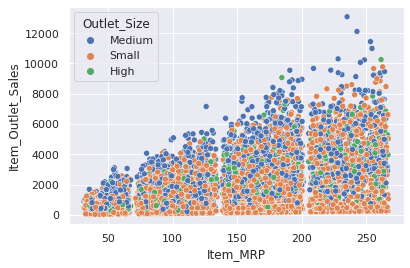

<Figure size 1440x1440 with 0 Axes>

In [37]:
sns.scatterplot(x='Item_MRP', y = 'Item_Outlet_Sales', data = df,hue ='Outlet_Size')
plt.figure(figsize=(20,20))
plt.show()

While analysing the plot we can see shops with medium size have more sales than others.

Which type of store have more sales ?


In [61]:
High_Sales= df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().reset_index(name = 'Mean Sales')
High_Sales

,Outlet_Type,Mean Sales
0,Grocery Store,339.828500
1,Supermarket Type1,2316.181148
2,Supermarket Type2,1995.498739
3,Supermarket Type3,3694.038558


Text(0.5, 1.0, 'Comparison Outlet type with sales')

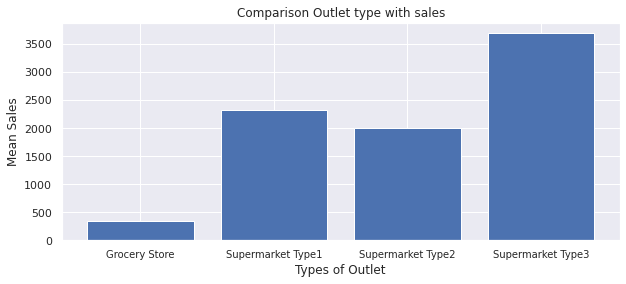

In [93]:
plt.bar(High_MRP['Outlet_Type'], High_MRP['Mean Sales'])
sns.set()
plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["xtick.labelsize"] = 13
plt.xlabel('Types of Outlet')
plt.ylabel('Mean Sales')
plt.title('Comparison Outlet type with sales')


While comparing the bar chart we can find Supermarket Type3 have overall sales than other type of stores,and supermarket typ1 have the 2nd more sales 